In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cd Downloads

C:\Users\Admin\Downloads


In [3]:
df = pd.read_csv("spam.tsv", sep='\t')

In [4]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [7]:
df.label.value_counts()/len(df)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [8]:
ham=df[df['label']=='ham']
spam=df[df['label']=='spam']

In [9]:
ham.shape,spam.shape


((4825, 4), (747, 4))

In [10]:
ham = ham.sample(spam.shape[0])

In [11]:
ham.shape

(747, 4)

In [12]:
data = ham.append(spam,ignore_index = True)

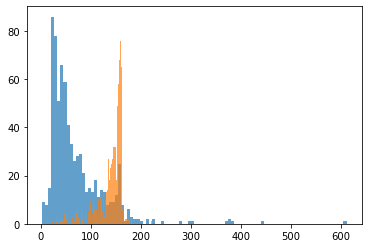

In [13]:
plt.hist(data[data['label'] == 'ham']['length'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['length'], bins = 100, alpha = 0.7)
plt.show()

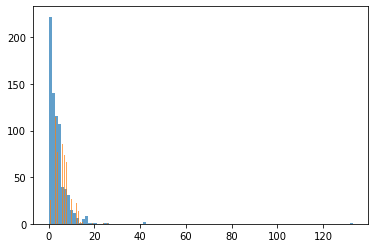

In [14]:
plt.hist(data[data['label'] == 'ham']['punct'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['punct'], bins = 100, alpha = 0.7)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data["message"], data['label'], test_size=0.33, random_state=42)

In [17]:
X_train.shape

(1000,)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

In [19]:
classifier = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", RandomForestClassifier(n_estimators=100))])

In [20]:
classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [21]:
y_pred = classifier.predict(X_test)

In [22]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [28]:
#Random Forest
accuracy_score(y_pred,y_test)

0.9473684210526315

In [23]:
confusion_matrix(y_pred,y_test)

array([[244,  23],
       [  1, 226]], dtype=int64)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      1.00      0.95       245
        spam       1.00      0.91      0.95       249

    accuracy                           0.95       494
   macro avg       0.95      0.95      0.95       494
weighted avg       0.96      0.95      0.95       494



In [25]:
from sklearn.svm import SVC

In [26]:
svm = Pipeline([("tfidf",TfidfVectorizer()),("classifier",SVC(C=100, gamma="auto"))])


In [27]:
svm.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

In [28]:
y_pred= svm.predict(X_test)

In [29]:
#svm
accuracy_score(y_test,y_pred)

0.9230769230769231

In [30]:
confusion_matrix(y_test, y_pred)

array([[243,   2],
       [ 36, 213]], dtype=int64)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.93       245
        spam       0.99      0.86      0.92       249

    accuracy                           0.92       494
   macro avg       0.93      0.92      0.92       494
weighted avg       0.93      0.92      0.92       494



In [32]:
#individual prediction
test1 = ['Hello, You are learning natural Language Processing']
test2 = ['Hope you are doing good and learning new things !']
test3 = ['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677']

In [33]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))

['ham']
['ham']
['spam']


In [34]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['ham']
['spam']
